In [1]:
def plot (data, fig_width = 19, fig_height = 4.5):
    xs = range(len(data))
    ys = [ [ d[0] for d in data ], [ d[1] for d in data ] ]

    fig = plt.figure(figsize = (fig_width, fig_height), dpi = 120, facecolor = 'w', edgecolor = 'k')
    plt.plot(xs, ys[0], '-k', color = 'orange')
    plt.plot(xs, ys[1], '-k', color = 'green')
    plt.show()

In [12]:
%matplotlib inline

import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

rate, data = wavfile.read('temp.wav')

rate

8000

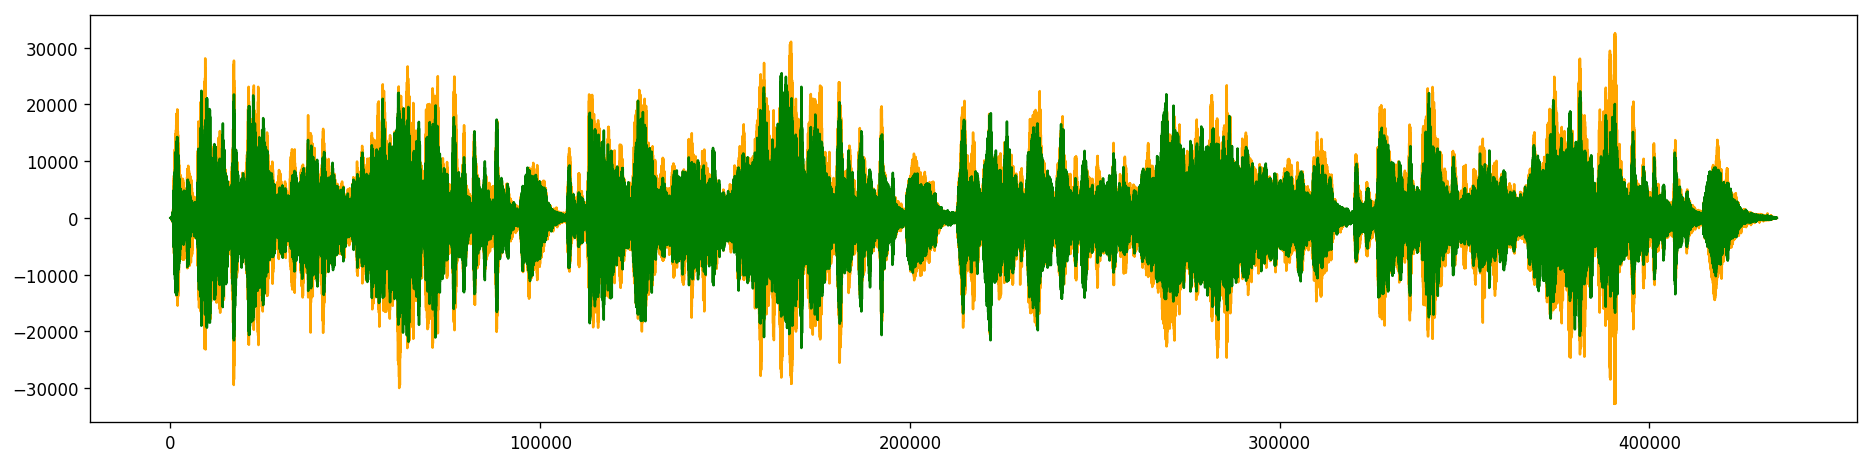

In [45]:
plot(data)
sd.play(data, 4000)

# Increase / lower volume

To increase or lower the volume of a sample, we need to change its amplitude. The measurement to change the amplitude should be in decibels ($dB$). A decibel [[1](http://www.indiana.edu/~emusic/etext/acoustics/chapter1_amplitude4.shtml)] _"is a measurement used to compare the ratio of power, intensity or amplitude between two acoustic sounds or electronic signals. The ratio (R) of two signals expressed by their power in watts (W1 and W2) is:"_


||
:-------------------- | ----:
$~x = 10log_{10}R$    | $(1)$
$R = \frac{W_1}{W_2}$ | $(2)$

For instance, _"a doubling of power _(or amplitude)_ equals an _(approximate)_ increase of +3dB"_ [[1](http://www.indiana.edu/~emusic/etext/acoustics/chapter1_amplitude4.shtml)].

In this case, we have $W_2$, the initial amplitude of the signal, and $x$, the value of decibels, but we're missing $W_1$, that is the final amplitude for the signal.

What we want to do is find $W_1$. To do so, we have to solve $R$ in $(1)$ and solve $W_1$ in $(2)$. Thus, we have:

||
:---------------------- | -------------: |
$R = 10^{\frac{x}{10}}$ | $(3)$
$W_1 = W_2 * R$         | $(3)$ in $(2)$

In [20]:
def volume (data, dB_variation):
    x = 10 ** (dB_variation / 10)
    
    return np.asarray([ [ d[0] * x, d[1] * x ] for d in data ], dtype = np.int16)

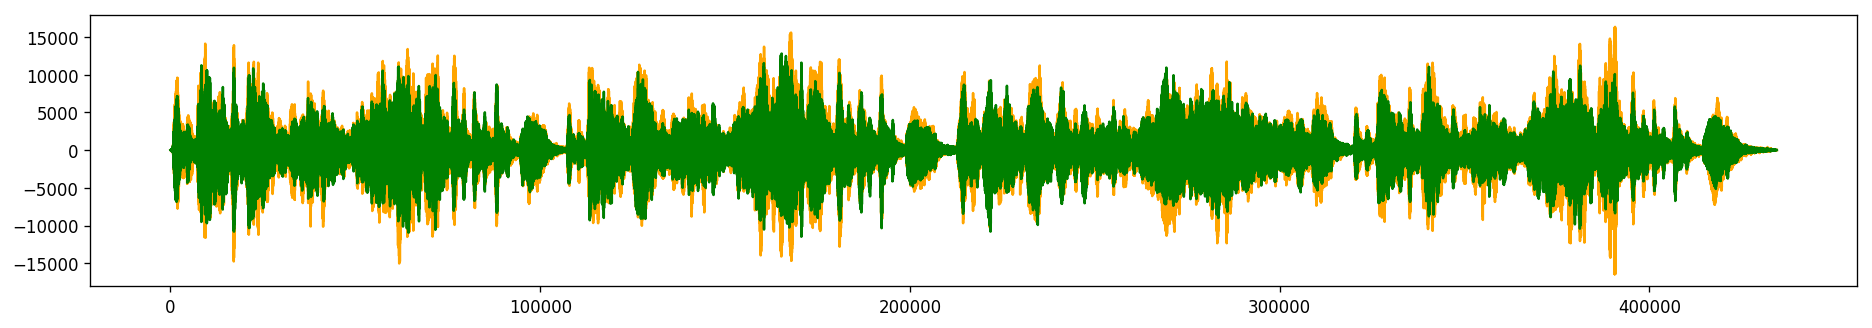

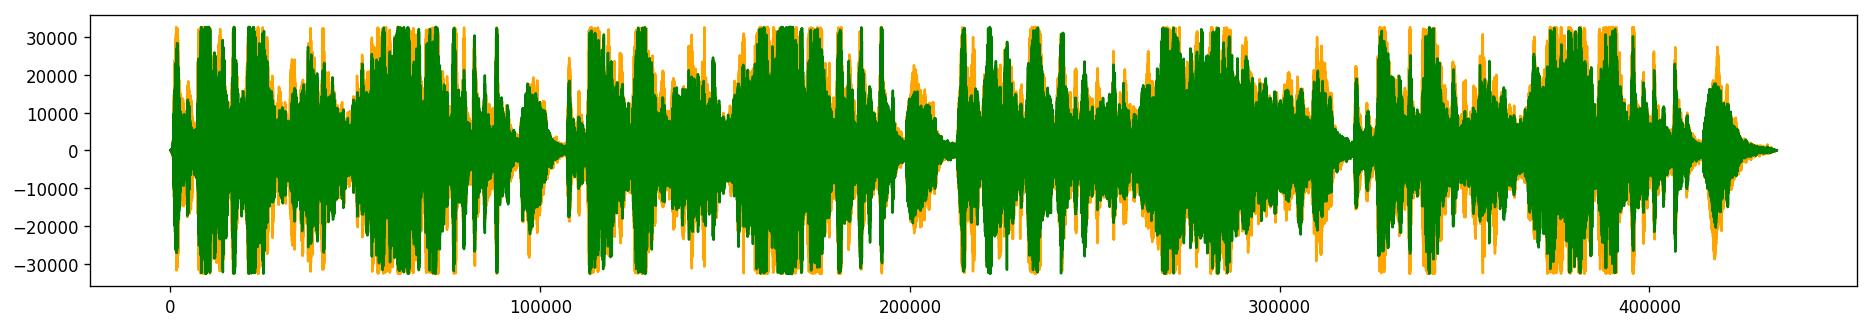

In [21]:
%matplotlib inline

data_vol_down = volume(data, -3)
wavfile.write('tempVolDown.wav', rate, data_vol_down)
data_vol_up = volume(data, 3)
wavfile.write('tempVolUp.wav', rate, data_vol_up)

plot(data_vol_down, fig_height = 3)
plot(data_vol_up, fig_height = 3)

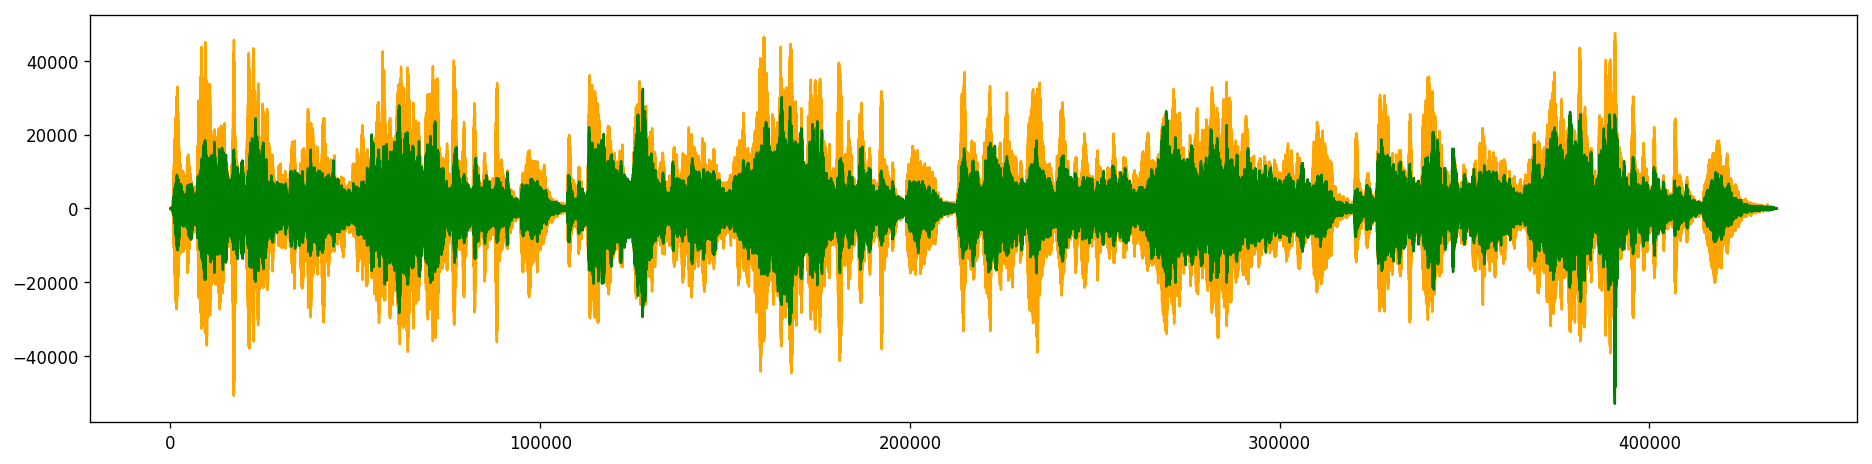

In [42]:
import sounddevice as sd
from scipy.fftpack import fft, ifft

d_left = np.asarray([ [d[1], 0 ] for d in data ], dtype = np.int16)
d_fft = fft(data)
d_fft_real = np.real(d_fft)

plot(d_fft_real)
sd.play(d_fft_real, rate)

## References

1. [Introduction to Computer Music: Volume One, Chapter One: An Acoustics Primer](http://www.indiana.edu/~emusic/etext/acoustics/chapter1_amplitude4.shtml)